## Spotify Tracking Analysis 

#### Loading required libraries 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
import networkx as nx
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### EDA 

In [39]:
# Loading set 
data = pd.read_excel("Spotifytracking.xlsx")
data
# Display the first few rows of the dataset to get an overview
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113951 non-null  object 
 3   album_name        113988 non-null  object 
 4   track_name        113990 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

(   Unnamed: 0                track_id                 artists  \
 0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
 1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
 2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
 3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
 4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
 
                                           album_name  \
 0                                             Comedy   
 1                                   Ghost (Acoustic)   
 2                                     To Begin Again   
 3  Crazy Rich Asians (Original Motion Picture Sou...   
 4                                            Hold On   
 
                    track_name  popularity  duration_ms  explicit  \
 0                      Comedy          73       230666     False   
 1            Ghost - Acoustic          55       149610     False   
 2              To Begin Again          57       21

In [40]:
# Remove rows with at least one missing value
data_clean = data.dropna()


In [41]:
df=data_clean
column_names_list = list(df.columns)
print(column_names_list)

['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [46]:
df=data
# Summary statistics for numerical features
df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [47]:
#Checking for duplicate rows in the data (there are no duplicate rows)
df[df.duplicated()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [48]:
# Count of unique values for categorical features
df.select_dtypes(include=['object', 'bool']).nunique()

track_id       89741
artists        31436
album_name     46576
track_name     73601
explicit           2
track_genre      114
dtype: int64

In [49]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [50]:
df.isnull().sum()

Unnamed: 0           0
track_id             0
artists             49
album_name          12
track_name          10
popularity           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
dtype: int64

In [51]:
df=df.dropna()


In [52]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [53]:
#Finding total number of artists who produced Top tracks
unique_artists = len(df['artists'].unique())
print("There are " , unique_artists , "Unique artists")

There are  31434 Unique artists


In [54]:
#Finding total number of unique Genres
unique_Genre = len(df['track_genre'].unique())
print("There are " , unique_Genre , "Unique Genres")

There are  114 Unique Genres


In [55]:
# Drop the 'Unnamed: 0' column and other non-continuous variables
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'], axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

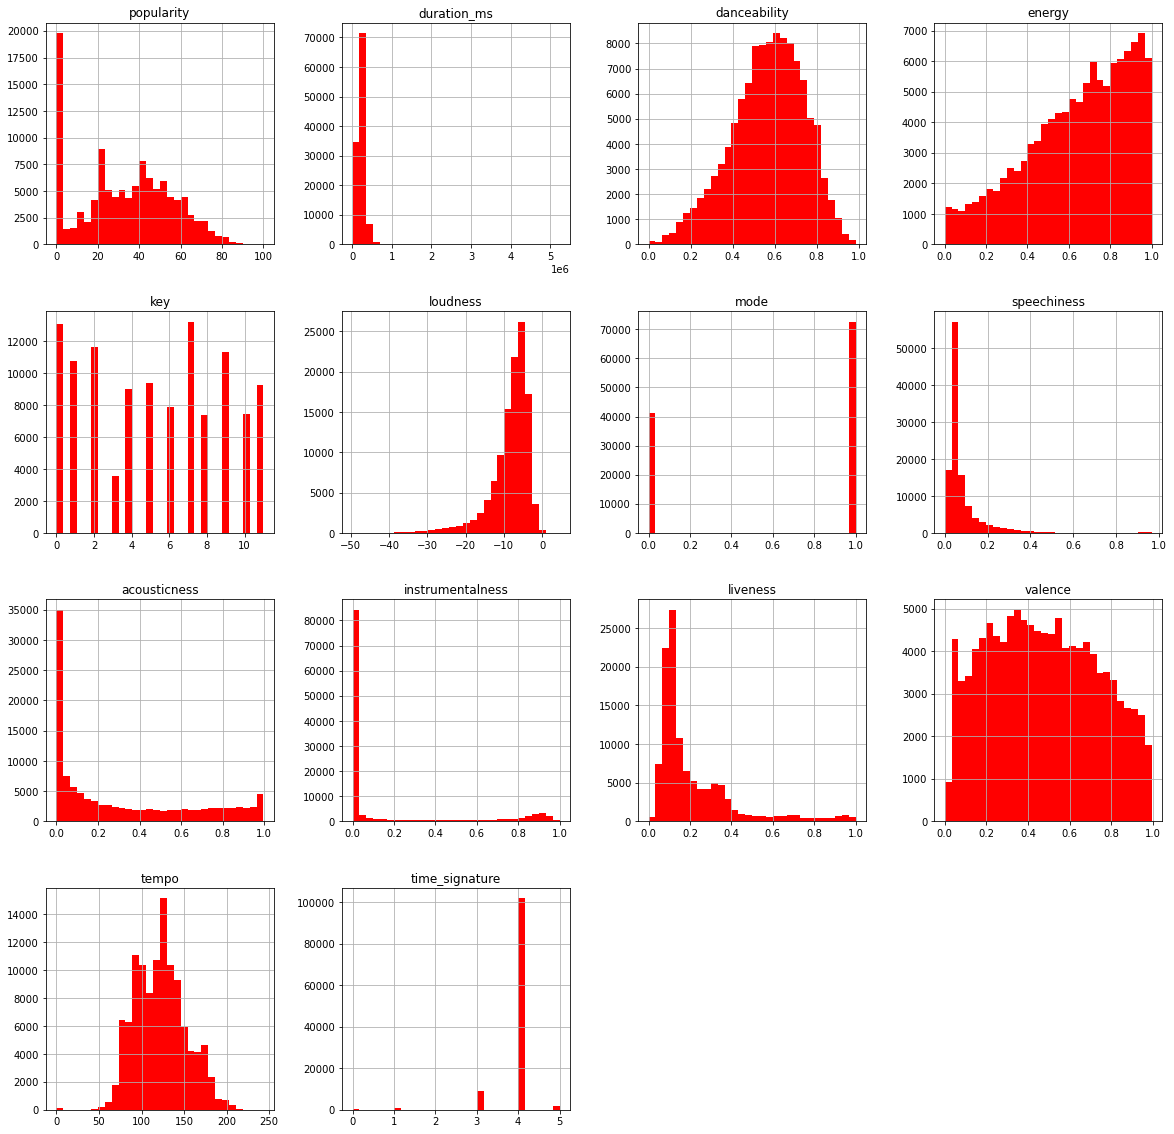

In [56]:
#Plotting histograms of each quantative variables
df.hist(bins=30, figsize=(20,20),color ='r')

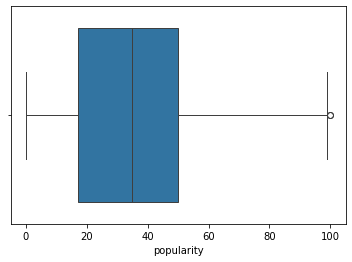

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['popularity'])
plt.show()


In boxplot, it appears there is one dot to the right of the upper whisker, which suggests there is at least one potential outlier in the 'popularity' data — a popularity score that is significantly higher than the rest. removing this can be a bias in the analysis since we are finding the measure of poularity 

### Objective 1: 
##### Part1- Using the continous variables predicting the factors of popularity 
Step1: Feature selection but removing all the non-numeric and un necessary columns according to prior knowledge of Music

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Load data
df = pd.read_excel('spotifytracking.xlsx')

# Drop non-numeric and non-informative columns
df.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name','track_genre'], axis=1, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Define independent and dependent variables
X = df.drop('popularity', axis=1)
y = df['popularity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Feature importance from Random Forest
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
features = sorted(zip(importances, X.columns), reverse=True)

# Using Recursive Feature Elimination
selector = RFE(rf, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]

# Print results
print("Lasso selected features:", X.columns[(lasso.coef_ != 0)])
print("Feature Importances:", features)
print("RFE selected features:", selected_features)


Lasso selected features: Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'instrumentalness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')
Feature Importances: [(0.10532413395115019, 'acousticness'), (0.09980125638419067, 'duration_ms'), (0.09926498439915658, 'tempo'), (0.0988396729613382, 'danceability'), (0.09828046974845879, 'valence'), (0.09645418751492699, 'speechiness'), (0.09373248517316808, 'loudness'), (0.08878130021094506, 'energy'), (0.08514219676287073, 'liveness'), (0.07027593001642993, 'instrumentalness'), (0.041317596775110904, 'key'), (0.009407123423322516, 'mode'), (0.0070605219935758355, 'explicit'), (0.006318140685355312, 'time_signature')]
RFE selected features: Index(['duration_ms', 'danceability', 'loudness', 'acousticness', 'tempo'], dtype='object')


In [24]:
list(df.columns)

['popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

## Choosing the Best Method
Lasso is good when you expect only a few variables to be truly important.
Random Forest is suitable when non-linear    
relationships are expected.
Recursive Feature Elimination (RFE) is a feature selection method often used within machine learning to identify and select a subset of relevant features for model construction. It is a type of wrapper feature selection method, meaning it involves a specific machine learning algorithm to determine the importance of each feature, and iteratively removes the least important features.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



Selecting the features with respect to LASSO feature selection. 

In [26]:
# Define the features and target variable
features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
            'instrumentalness', 'valence', 'tempo']
X = df[features]
y = df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [27]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
linear_pred = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
print(f'Linear Regression MSE: {linear_mse}')
print(f'Linear Regression R^2: {linear_r2}')


Linear Regression MSE: 484.166095727617
Linear Regression R^2: 0.021540213892795812


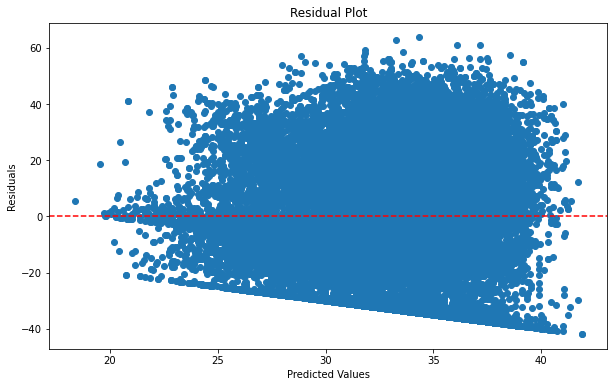

Shapiro-Wilk Test: Statistics=0.972, p=0.000


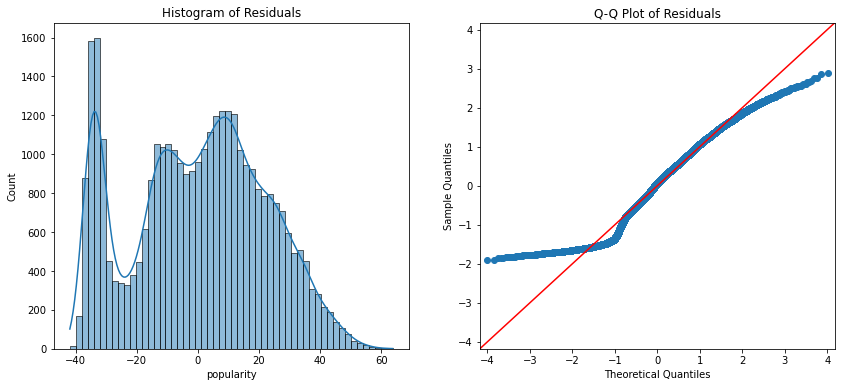

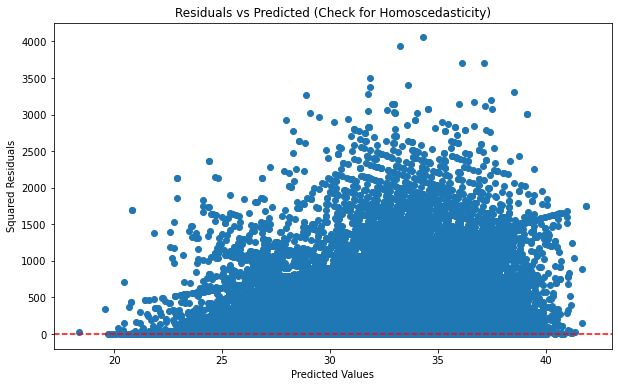

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.api as sm
# Calculate residuals
residuals = y_test - linear_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(linear_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Checking for normality of residuals
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Residuals')
sm.qqplot(residuals, line ='45', fit=True, ax=ax[1])  # Requires statsmodels.api as sm
ax[1].set_title('Q-Q Plot of Residuals')

# Shapiro-Wilk test for normality
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

# Test for homoscedasticity visually using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(linear_pred, np.square(residuals))
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Squared Residuals')
plt.title('Residuals vs Predicted (Check for Homoscedasticity)')
plt.show()


1. Residual Plot: Shows pattern with increasing predicted values, indicating heteroscedasticity.
2. Shapiro-Wilk Test: Low p-value (0.000) suggests non-normal distribution of residuals.
3. Histogram: Multiple peaks instead of bell curve imply non-normality or subgroups.
4. Q-Q Plot: Deviations from reference line confirm non-normality of residuals.
5. Standardized Residuals: Funnel-shaped pattern indicates inconsistent variance across predicted values.

**Interpretation**:
- Model assumptions of normality and constant variance are violated.
- Reliability of predictions and validity of inferences may be affected.
- Consider data transformations, alternative models, or robust regression techniques for improvement.
- The histogram shows a distribution that has multiple peaks and is not symmetric around zero, which suggests that the residuals are not normally distributed. This could be an indication that the model isn't capturing all of the patterns in the data, or that there are other underlying issues such as non-linearity, outliers, or heteroscedasticity


In [29]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
ridge_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Ridge Regression R^2: {ridge_r2}')


Ridge Regression MSE: 484.166090925393
Ridge Regression R^2: 0.02154022359769492


In [30]:
# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_model.predict(X_test)

# Evaluate the model
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Lasso Regression R^2: {lasso_r2}')


Lasso Regression MSE: 484.21704457907674
Lasso Regression R^2: 0.021437250461978197


In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Random Forest
rf_model = RandomForestRegressor(n_estimators=150)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

#Gradient Boosting Machines
gbm_model = GradientBoostingRegressor(n_estimators=150)
gbm_model.fit(X_train, y_train)
gbm_predictions = gbm_model.predict(X_test)

#Support Vector Machine for Regression
svm_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Evaluating Random Forest Model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse:.3f}")
print(f"Random Forest R^2: {rf_r2:.3f}")

# Evaluating Gradient Boosting Machine Model
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)
print(f"Gradient Boosting MSE: {gbm_mse:.3f}")
print(f"Gradient Boosting R^2: {gbm_r2:.3f}")

# Evaluating SVM Regression Model
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM Regression MSE: {svm_mse:.3f}")
print(f"SVM Regression R^2: {svm_r2:.3f}")


Random Forest MSE: 240.046
Random Forest R^2: 0.515
Gradient Boosting MSE: 449.516
Gradient Boosting R^2: 0.092
SVM Regression MSE: 459.003
SVM Regression R^2: 0.072


- **Random Forest**: MSE of 240.002 and R^2 of 0.515, indicating the best performance.
- **Gradient Boosting**: High MSE of 449.517 and low R^2 of 0.092, suggesting poorer accuracy.
- **SVM Regression**: MSE of 459.003 and R^2 of 0.072, showing subpar performance.
- **Lasso Regression**: Highest MSE of 484.217 and very low R^2 of 0.021, indicating poor fit.
- **Ridge Regression**: Similar performance to Lasso with MSE of 484.166 and R^2 of 0.0215.
- **Linear Regression**: Identical performance to Ridge Regression with MSE and R^2 values of 0.0215.

**Conclusion**: Random Forest is the best model with the lowest MSE and highest R^2. Other models perform poorly, suggesting the dataset's complexity requires a more robust approach.

In [32]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize models
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
gbm_model = GradientBoostingRegressor(n_estimators=150, random_state=42)
svm_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
#nn_model = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100,100,100,100),activation='relu', max_iter=500, random_state=42))


nn_model = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(50, 100, 50),  
        activation='relu',                
        solver='adam',                    
        alpha=0.0001,                      
        batch_size='auto',                 
        learning_rate='adaptive',          
        learning_rate_init=0.001,       
        max_iter=500,                      
        shuffle=True,                     
        random_state=42,                 
        tol=0.0001,                        
        verbose=False )) 
# Fit models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
nn_predictions = nn_model.predict(X_test)

# Evaluate models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

# Print performance
print(f"Random Forest MSE: {rf_mse:.3f}, R^2: {rf_r2:.3f}")
print(f"Gradient Boosting MSE: {gbm_mse:.3f}, R^2: {gbm_r2:.3f}")
print(f"SVM Regression MSE: {svm_mse:.3f}, R^2: {svm_r2:.3f}")
print(f"Neural Network MSE: {nn_mse:.3f}, R^2: {nn_r2:.3f}")


Random Forest MSE: 240.527, R^2: 0.514
Gradient Boosting MSE: 449.519, R^2: 0.092
SVM Regression MSE: 459.003, R^2: 0.072
Neural Network MSE: 415.657, R^2: 0.160


### Objective 1: part2 - Taking Popularity to be the binary variable, how can we predict the popularity 
-- Using three models to predict the Popularity and compare them 

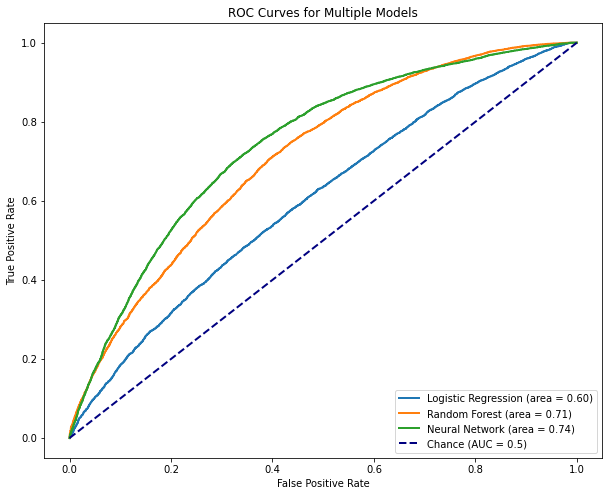

                      AUC ROC  Accuracy Precision    Recall
Logistic Regression  0.602649  0.568289  0.559832  0.623668
Random Forest        0.711162   0.65557  0.637628  0.714713
Neural Network       0.742224  0.687018   0.67589  0.714097


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
df_full=data
# Load the data
df_full= pd.read_excel("Spotifytracking.xlsx")

# Check for any unnecessary columns like 'Unnamed: 0' and drop them
if 'Unnamed: 0' in df_full.columns:
    df_full.drop('Unnamed: 0', axis=1, inplace=True)

# Define features and target
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
             'instrumentalness', 'liveness', 'valence', 'tempo']


X = df_full[features]

y = df_full['popularity']

# Binarize the popularity score
y_binarized = (y >= 35).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
nn_clf = MLPClassifier(hidden_layer_sizes=(100,50,50,50,50,50), random_state=42, max_iter=1000)

# Fit models
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
nn_clf.fit(X_train_scaled, y_train)

# Predict probabilities
log_reg_probas = log_reg.predict_proba(X_test_scaled)[:, 1]
rf_probas = rf_clf.predict_proba(X_test_scaled)[:, 1]
nn_probas = nn_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
metrics = pd.DataFrame(index=['Logistic Regression', 'Random Forest', 'Neural Network'],
                       columns=['AUC ROC', 'Accuracy', 'Precision', 'Recall'])

metrics.loc['Logistic Regression'] = [
    roc_auc_score(y_test, log_reg_probas),
    accuracy_score(y_test, log_reg.predict(X_test_scaled)),
    precision_score(y_test, log_reg.predict(X_test_scaled)),
    recall_score(y_test, log_reg.predict(X_test_scaled))
]

metrics.loc['Random Forest'] = [
    roc_auc_score(y_test, rf_probas),
    accuracy_score(y_test, rf_clf.predict(X_test_scaled)),
    precision_score(y_test, rf_clf.predict(X_test_scaled)),
    recall_score(y_test, rf_clf.predict(X_test_scaled))
]

metrics.loc['Neural Network'] = [
    roc_auc_score(y_test, nn_probas),
    accuracy_score(y_test, nn_clf.predict(X_test_scaled)),
    precision_score(y_test, nn_clf.predict(X_test_scaled)),
    recall_score(y_test, nn_clf.predict(X_test_scaled))
]

# Plot ROC curves
plt.figure(figsize=(10, 8))

for model_name, probas in zip(['Logistic Regression', 'Random Forest', 'Neural Network'],
                              [log_reg_probas, rf_probas, nn_probas]):
    fpr, tpr, _ = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.show()

# Display metrics
print(metrics)

The ROC curve illustrates a classification model's performance across various thresholds by plotting TPR against FPR. AUC summarizes this performance, with higher values indicating better classification ability.

- **AUC Values**: Logistic Regression (0.61), Random Forest (0.71), Neural Network (0.74).
- **Interpretation**: Neural Network excels in classifying positive and negative classes, followed by Random Forest and Logistic Regression.
- **Metrics**: Neural Network leads in accuracy and precision, with slightly lower recall than Random Forest.

**Conclusion**: Neural Network is the top performer based on AUC values, offering a good balance between TPR and FPR. Consider trade-offs between metrics for specific project requirements.

## Objective 2: Applying PCA and K means to group in to 3 clusters depending upon the factors 
Step1: Apply PCA to know how many variation can be explained 
Step2: Apply K means clustering

Explained variance by each component: [0.24707064 0.12018182 0.10354424 0.09680092 0.07924671 0.07488188
 0.07262241 0.06631286 0.06219179 0.03836176 0.02712523 0.01165974]
Cumulative variance explained: [0.24707064 0.36725247 0.47079671 0.56759763 0.64684434 0.72172622
 0.79434862 0.86066149 0.92285327 0.96121503 0.98834026 1.        ]
Number of components explaining 90% of variance: 9


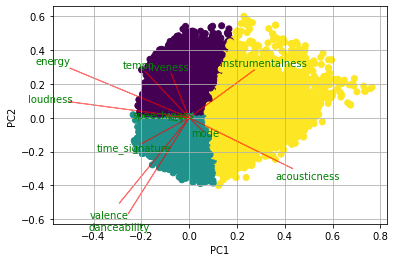

In [58]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_excel('Spotifytracking.xlsx')  # Replace with your actual data file

# Selecting features
features = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
               'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


# Applying PCA without specifying the number of components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# The amount of variance that each PC explains
variance = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(variance)

# How many components explain more than 90% of the variance, for instance
n_components_90 = np.where(cumulative_variance > 0.9)[0][0] + 1

print(f'Explained variance by each component: {variance}')
print(f'Cumulative variance explained: {cumulative_variance}')
print(f'Number of components explaining 90% of variance: {n_components_90}')

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Creating biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=clusters)
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Call the function
biplot(X_pca, np.transpose(pca.components_[0:2, :]), labels=features.columns)
plt.show()

- **PCA Output Summary**:
  1. **Explained Variance**: First component explains 24.7%, second 12.1%, and so on.
  2. **Cumulative Variance**: First two components explain 36.7% of total variance.
  3. **Components for 90% Variance**: 9 components needed to explain 90% of dataset variance.
- **Purpose of PCA**:
  - **Dimensionality Reduction**: Simplifies models by focusing on key components.
  - **Enhances Performance**: Preprocessing step to improve machine learning algorithms.
  - **Simplifies Data**: Aids in visualization and understanding of complex datasets.

   danceability    energy       key  loudness      mode  speechiness  \
0     -0.540757  0.997538  0.722239  0.836629 -1.160766     0.696979   
1      1.402053  0.369384  0.691866  0.569126 -0.119237     0.717187   
2     -0.861296 -1.366921 -1.414105 -1.405755  1.280002    -1.414165   

   acousticness  instrumentalness  liveness   valence     tempo  \
0     -1.015932         -0.011740  1.411691 -0.454700  1.342716   
1     -0.344038         -1.218833 -0.632729  1.387064 -0.286866   
2      1.359970          1.230573 -0.778962 -0.932364 -1.055851   

   time_signature  
0        0.429753  
1        0.951950  
2       -1.381703  


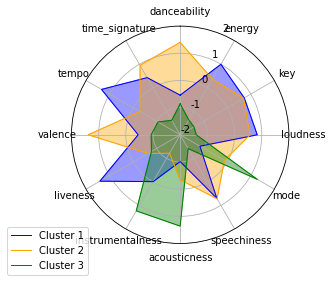

In [60]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('Spotifytracking.xlsx')

# Selecting features
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
X = df[features]

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)  # You can choose more components if needed
X_pca = pca.fit_transform(X_scaled)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Adding cluster info to the dataset
df['cluster'] = clusters

# Compute cluster centroids from the original feature space
centroids = df.groupby('cluster')[features].mean()
# Fit and transform the centroids
normalized_centroids = scaler.fit_transform(centroids)

# Create a DataFrame for the normalized centroids for better readability and export
normalized_centroids_df = pd.DataFrame(normalized_centroids, columns=features)
normalized_centroids_df.to_csv('centroids.csv', index=False)
print(normalized_centroids_df)
import matplotlib.pyplot as plt
from math import pi
#%%%%%%%%%%%%%%%%%%%

# Find the min and max values to determine the range of the radar chart
min_value = -2
max_value = 2

# Adjusting the yticks to cover the range from min to max
yticks = list(range(int(min_value), int(max_value) + 1))
df1=normalized_centroids_df
# number of variable
categories = list(df1)
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

colors = ['blue', 'orange', 'green']

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Setting the categories labels
plt.xticks(angles[:-1], categories)

# Draw ytick labels to avoid the first label (0) to be on top of the plot
plt.yticks(yticks, [str(y) for y in yticks])

# Set the r-axis limits to include negative values
ax.set_rlim(min_value, max_value)

# Plot each cluster
for i in range(df1.shape[0]):
    values = df1.iloc[i].values.flatten().tolist()
    values += values[:1]  # Ensure the graph starts and ends at the same point
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster ' + str(i+1), color=colors[i])
    ax.fill(angles, values, color=colors[i], alpha=0.4)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

#%%%%%%%%%%%%%%%%%%


Positive values indicate a higher than average presence of that attribute in the dataset, while negative values indicate a lower than average presence. The magnitude of the number shows the strength of this deviation from the mean. For instance, a larger absolute value would mean a stronger deviation.


**Conclusion**:
The analysis of song clusters reveals distinct characteristics:
- **Acoustic Mellow (Blue)**: Characterized by high acousticness and instrumentalness, representing softer,slower tracks with acoustic instruments. Low danceability, energy, key, loudness, and tempo indicate a relaxed listening experience, likely in minor keys for a soothing ambiance.

- **Dynamic Rhythms (Green)**: Featuring medium danceability and energy, these songs offer a blend of dance-friendly beats and engaging listening experiences. High key and tempo suggest lively tracks with faster beats, while low mode and acousticness hint at a focus on electronic sounds over naturalinstruments
- **Energetic Beats (Orange)**: Songs with high danceability, key, speechiness, and valence, indicating upbeat tracks with clear vocals and positive energy. Medium energy, loudness, mode, and temposuggest a balanced intensity suitable for various settings.

Understanding these cluster traits is valuable for applications like music recommendation, genre classification, and market analysis, enhancing insights into song preferences and characteristics.